In [ ]:
"""
Strategy One:
A simple one-shot elevator.
It starts at a random floor, chooses the nearest passenger to it, picks them up and drops them off. Afterwards, looks
again for nearest passenger and so on.

Attributes:
CurrentFloor is the elevator's current floor.
DesiredFloor is where the elevator is heading.
PassengerNumber is how many passengers are on the elevator (In this scenario, it's either 0 or 1).
Counter is a list which is going to be used to keep track of how many steps the elevator takes. This is going to be
used as a measure of how efficient the elevator is. It starts counting from when the first passenger requests the 
elevator until the last passenger is dropped off.

Methods:
FindMin is where the bulk of the work is. It acccepts a parameter "Passenger" which is an array with dimensions m*3
where m is the number of passengers in the simulation. The columns represent Passenger ID, current floor, and desired
floor respectively. It starts by passing through the list of random passengers to find the nearest passenger.
It records the index of that passenger, and uses the index to record the passenger's current and desired floors. It then
deletes the passenger from the passenger list so it doesn't pick them up again.

MoveToPassenger is a simple while loop. It starts by computing the difference between the elevator's current floor
and destination floors to see if it's going up or down, and then iteratively moves between floors.

AddPassenger simply converts the value of PassengerNumber to reflect that a passenger is in the elevator.

MoveToLocation is the same as MoveToPassenger, except it moves to the passenger's desired location rather than
their current location.

Run is the simulation starter.

The Building and Passenger classes were formed to be kept at a complete minimum.

The simulation is initiated by creating a randomized array of passengers. The list is then cleaned to make sure
no passenger has the same current location as their desired location. The simulation is then run and the values
of the resulting counters are stored for efficiency evaluation.

The final chosen efficiency measure is average elevator steps taken. This is going to be plotted against number of passengers
in the system. So, each simulation will be repeated several times and at different numbers of passengers in the system
in order to store and present the final data.
"""

In [22]:
import numpy as np  #Importing Libraries
import random
import matplotlib.pyplot as plt
import matplotlib.style as style
class Elevator:
    def __init__(self, Building, DesiredFloor = 0, PassengerNumber = 0):
        self.CurrentFloor = random.randint(Building.MinFloor,Building.MaxFloor)
        self.DesiredFloor = DesiredFloor
        self.DesiredFloor2 = 0
        self.PassengerNumber = 0
        self.Counter = []
    
    def FindMin(self, Passenger):
        MinList=[]
        for i in Passenger[1:,1]:
            MinList.append(abs(i-self.CurrentFloor)) #Appending differences with each passenger location
        Minimum = min(MinList) #Finding the minimum
        '''
        Here, I added a couple of lines of code that gives the elevator the ability to scan the passengers 
        in that particular floor and determine the one whose destination floor is the closest. 
        
        '''
        minpeople = [] #Iterating through the list to find the index for people in that particular floor
        minpeople = [i for i, x in enumerate(MinList) if x == Minimum]
        MinDesiredFloor = [] 
        for i in Passenger[minpeople, 2]: #Iterate across the index of people to find the difference between 
                                          #their destination and them
            MinDesiredFloor.append(abs(i-MinList.index(Minimum))) #Add those differences to a list
        MinimumDesiredFloor = min(MinDesiredFloor) #Find the minimum difference in floors
        index=MinDesiredFloor.index(MinimumDesiredFloor)      
        '''  
        End of additional code.
        
        '''
        self.DesiredFloor=Passenger[index,1]  #Setting the desired floor to pick up the passenger
        self.DesiredFloor2 = Passenger[index,2] #Setting the desired floor to drop off the passenger
        Passenger = np.delete(Passenger, index, 0) #removing the passenger from the pool of possible pick-ups.
        return(Passenger)

    def MoveToPassenger(self, Passenger, Building):
        if self.CurrentFloor - self.DesiredFloor < 0: #If direction is positive
            while self.CurrentFloor<self.DesiredFloor and self.CurrentFloor < Building.MaxFloor:
                    self.CurrentFloor+=1 #Keep increasing the current floor until you reach the passenger (or max floor).
                    self.Counter.append(1)
                    
        elif self.CurrentFloor - self.DesiredFloor > 0:
            while self.CurrentFloor>self.DesiredFloor and self.CurrentFloor > Building.MinFloor:
                self.CurrentFloor-=1
                self.Counter.append(1)
        
    def AddPassenger(self,Passenger):
        self.PassengerNumber = 1

    def MoveToLocation(self, Building):
        if self.CurrentFloor - self.DesiredFloor2 < 0:
            while self.CurrentFloor<self.DesiredFloor2 and self.CurrentFloor < Building.MaxFloor:
                self.CurrentFloor+=1
                self.Counter.append(1)
    
        elif self.CurrentFloor - self.DesiredFloor2 >0:
            while self.CurrentFloor>self.DesiredFloor2 and self.CurrentFloor > Building.MinFloor:
                self.CurrentFloor-=1
                self.Counter.append(1)
        
    def DeliverPassenger(self):
        if self.CurrentFloor==self.DesiredFloor2:
            self.PassengerNumber=0
                    
        
    def Run(self, Passenger, Building):
        for i in range(len(Passenger[1:,:])):
            Passenger = self.FindMin(Passenger)
            self.MoveToPassenger(Passenger, Building)
            self.AddPassenger(Passenger)
            self.MoveToLocation(Building)
            self.DeliverPassenger()

In [23]:
class Building:
    def __init__(self, MaxFloor, MinFloor):
        self.MaxFloor = MaxFloor
        self.MinFloor = MinFloor

In [24]:
class Passenger:
    def __init__(self, CurrentFloor, DesiredFloor):
        self.CurrentFloor = CurrentFloor
        self.DesiredFloor = DesiredFloor

In [25]:
"""
The Simulation function has two parameters, n and m. n denotes how many times the simulation will be repeated, while
m is the number of passengers per simulation.
Once those parameters are chosen, the function returns the average steps taken for the simulation to complete.
"""

'\nThe Simulation function has two parameters, n and m. n denotes how many times the simulation will be repeated, while\nm is the number of passengers per simulation.\nOnce those parameters are chosen, the function returns the average steps taken for the simulation to complete.\n'

In [26]:
def Simulation(n,m):
    CountStorage = [] #an empty list to store the counters from the simulation
    for i in range(n):
        PassengerList = [] #List to store the passenger classes
        for i in range(m):
            PassengerList.append(Passenger(random.randint(0,20),random.randint(0,20))) #Append passenger classes
        PassengerList                                                     #With randomized current and desired drop offs.
        PassengerArray = np.array([0,0,0],ndmin=2) #Now, we append the information in an array for easier access.
        for i in PassengerList:
            PassengerArray = np.vstack([PassengerArray, [i, i.CurrentFloor, i.DesiredFloor]]) #Stack information in array.

        for i in PassengerArray[1:,2]:  #This loop deletes any row where the passenger's current floor is equal to their
            if PassengerArray[i,1] == PassengerArray[i,2]:  #Desired drop off.
                PassengerArrayFinal = np.delete(PassengerArray,i,0)
                
        Building1 = Building(20, 0) #Generate a building object with 20 floors (from 0 to 20)
        Elevator1 = Elevator(Building1) #Generate the elevator object
        Elevator1.Run(PassengerArray, Building1) #Run the simulation
        CountStorage.append(Elevator1.Counter.count(1)) #Store the counts
        
        Average = (sum(CountStorage)/n)/m #Compute the average count per simulation.
    return Average

In [27]:
AverageData = [] #Repeat the simulation 100 times, varying the number of passengers from 20 to 200 each time.
for j in range(20,200):
    AverageData.append(Simulation(100,j))
    

"""
Side note:
For some reason, the code breaks down when using a value less than 20 in the range.
"""

'\nSide note:\nFor some reason, the code breaks down when using a value less than 20 in the range.\n'

Text(0, 0.5, 'Average Steps Taken by Elevator Per Passenger')

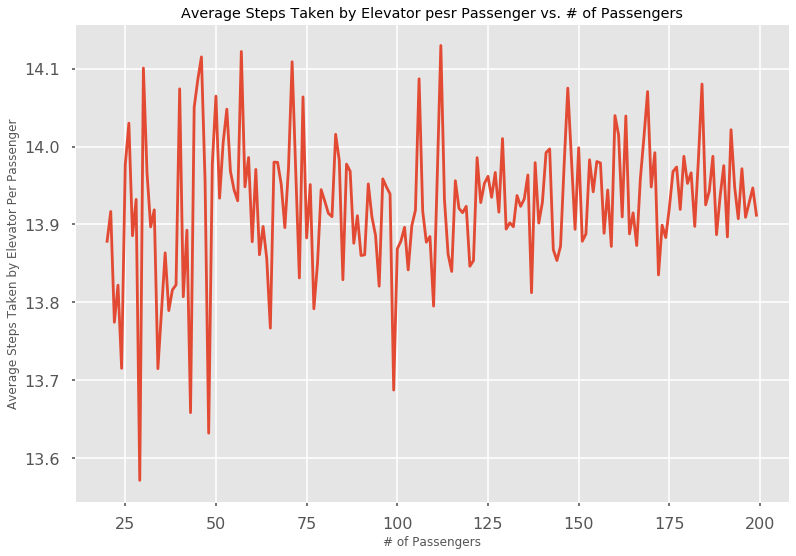

In [28]:
style.use('seaborn-poster')
style.use('ggplot')
plt.plot(range(20,200), AverageData)
plt.title('Average Steps Taken by Elevator pesr Passenger vs. # of Passengers')
plt.xlabel('# of Passengers')
plt.ylabel('Average Steps Taken by Elevator Per Passenger')

In [29]:
def Simulation2(n,m):
    CountStorage = [] #an empty list to store the counters from the simulation
    for i in range(n):
        PassengerList = [] #List to store the passenger classes
        for i in range(m):
            PassengerList.append(Passenger(random.randint(0,20),random.randint(0,20))) #Append passenger classes
        PassengerList                                                     #With randomized current and desired drop offs.
        PassengerArray = np.array([0,0,0],ndmin=2) #Now, we append the information in an array for easier access.
        for i in PassengerList:
            PassengerArray = np.vstack([PassengerArray, [i, i.CurrentFloor, i.DesiredFloor]]) #Stack information in array.

        for i in PassengerArray[1:,2]:  #This loop deletes any row where the passenger's current floor is equal to their
            if PassengerArray[i,1] == PassengerArray[i,2]:  #Desired drop off.
                PassengerArrayFinal = np.delete(PassengerArray,i,0)
                
        Building1 = Building(20, 0) #Generate a building object with 20 floors (from 0 to 20)
        Elevator1 = Elevator(Building1) #Generate the elevator object
        Elevator1.Run(PassengerArray, Building1) #Run the simulation
        CountStorage.append(Elevator1.Counter.count(1)) #Store the counts
        
        Average = (sum(CountStorage)/n) #Compute the average count per simulation.
    return Average

AverageData1 = [] #Repeat the simulation 100 times, varying the number of passengers from 20 to 200 each time.
for j in range(20,200):
    AverageData1.append(Simulation2(100,j))
    

Text(0, 0.5, 'Average Steps Taken by Elevator')

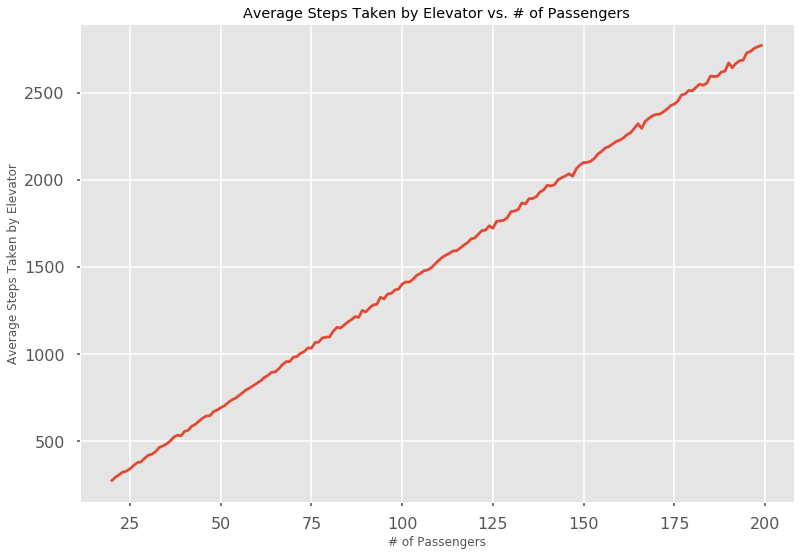

In [30]:
plt.plot(range(20,200), AverageData1)
plt.title('Average Steps Taken by Elevator vs. # of Passengers')
plt.xlabel('# of Passengers')
plt.ylabel('Average Steps Taken by Elevator')

In [ ]:
"""
We notice slight noise in the line due to the randomness of the data. The noise is expected to decrease after
increasing the number of samples we average over.
The final trend seems to be a curve that decreases at a decreasing rate, and finally tends to a fixed value.
"""